In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def calc_chi2(y, err, yfit , v = True):
    """
    Compute chi2 between data and fitted curve

    Parameters
    ----------
    y: array
        y values of data
    err: array (1D or 2D)
        either error bars (if independent data points)
        or covariance matrix
    yfit: array
        fitted values of data
    v: bool
        verbose output

    Returns
    -------
    chi2: float
    """
    if err.shape == (len(y),len(y)):
        #use full covariance
        if v:
            print('cov_mat chi2')
        inv_cov = np.linalg.inv( np.matrix(err) )
        chi2 = (y-yfit)@inv_cov@(y-yfit).T
        return chi2
        
    elif err.shape == (len(y),):
        if v:
            print('diagonal chi2')
        return sum(((y-yfit)**2.)/(err**2.))
    else:
        raise IOError('error in err or cov_mat input shape')

In [3]:
def norm_cov(cov):
    """
    normalize the input covariance matrix
    """
    norm = cov.copy()
    for i in range(len(cov)):
        for j in range(len(cov)):
            norm[i][j] /= np.sqrt(cov[i][i]*cov[j][j])
    return norm

collapsed cells below are desy1:

In [ ]:
desy1t = h5py.File('../TXPipe/data/desy1/outputs/tau_stats.hdf5','r')
desy1r = h5py.File('../TXPipe/data/desy1/outputs/rowe_stats.hdf5','r')
desy1_tau = np.append(desy1t['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy1t['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy1t['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy1_cov = desy1t['tau_statistics/tau_PSF-reserved/cov'][:]
desy1_cov_diag = desy1t['tau_statistics/tau_PSF-reserved/cov'][:]
desy1_fit = np.append(desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])
desy1t.close()
desy1r.close()


In [ ]:
print(np.shape(desy1_cov))
print(np.shape(desy1_tau))
print(np.shape(desy1_fit))

In [ ]:
desy1_chisq = calc_chi2(desy1_tau,desy1_cov,desy1_fit)
print(desy1_chisq/(60))

desy3 bootstrap: <br> this is a singular measurement and covariance

In [4]:
desy3t = h5py.File('../TXPipe/data/desy3/outputs/tau_stats.hdf5','r')
desy3r = h5py.File('../TXPipe/data/desy3/outputs/rowe_stats.hdf5','r')
desy3_tau = np.append(desy3t['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3t['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3t['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_cov = desy3t['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fit = np.append(desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])
#desy3t.close()
#desy3r.close()

In [5]:
desy3_chisq = calc_chi2(desy3_tau,desy3_cov,desy3_fit)
print(desy3_chisq/(60))

cov_mat chi2
[[18.765127]]


checking jackknife cov: <br> again, this i a singular measurement and covariance <br> this was with 40 patches.

In [6]:
desy3tjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/tau_stats-40patches.hdf5','r')
desy3rjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/rowe_stats-40patches.hdf5','r')
desy3_taujk = np.append(desy3tjk['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tjk['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tjk['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covjk = desy3tjk['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitjk = np.append(desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])


In [7]:
desy3jk_chisq = calc_chi2(desy3_taujk,desy3_covjk,desy3_fitjk)
print(desy3jk_chisq/(60))

cov_mat chi2
[[-1.99630789e+15]]


Now let's average 10 jackknife covariances, still with 40 patches

In [8]:
lst = range(10)
cov_sum = np.zeros((60,60))
for i in lst:
    with h5py.File(f'../TXPipe/data/desy3/outputs_jkknife/tau_stats-{i+1}.hdf5') as f:
        cov_sum = cov_sum+f['tau_statistics/tau_PSF-reserved/cov'][:] 
    cov_avg = cov_sum/10

In [9]:
print(calc_chi2(desy3_taujk,cov_avg,desy3_fitjk)/60)

cov_mat chi2
[[31.79431049]]


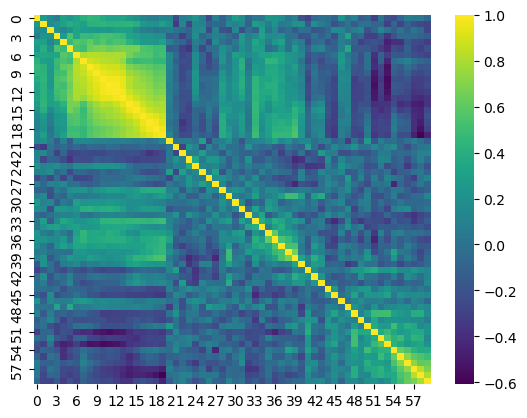

In [10]:
ax = sns.heatmap(norm_cov(cov_avg),cmap='viridis')
plt.show()

In [ ]:
for i in range(10):
    with h5py.File(f'../TXPipe/data/desy3/outputs_jkknife/tau_stats-{i+1}.hdf5') as f:    
        ax = sns.heatmap(norm_cov(f['tau_statistics/tau_PSF-reserved/cov'][:]),cmap='viridis')
        plt.show()

In [ ]:

cov1 = h5py.File(f'../TXPipe/data/desy3/outputs_jkknife/tau_stats-1.hdf5')
cov2 = h5py.File(f'../TXPipe/data/desy3/outputs_jkknife/tau_stats-2.hdf5')
diff = cov1['tau_statistics/tau_PSF-reserved/cov'][:] - cov2['tau_statistics/tau_PSF-reserved/cov'][:]
ax = sns.heatmap(diff,cmap='viridis')
plt.show()

print(np.diag(diff)/np.diag(cov1['tau_statistics/tau_PSF-reserved/cov'][:]))

trying 1 cov with 150 jackknife patches

In [11]:
desy3tjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/tau_stats-150-1.hdf5','r')
desy3rjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/rowe_stats-150-1.hdf5','r')
desy3_taujk = np.append(desy3tjk['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tjk['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tjk['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covjk = desy3tjk['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitjk = np.append(desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])


In [12]:
print(calc_chi2(desy3_taujk,desy3_covjk,desy3_fitjk)/60)

cov_mat chi2
[[2.80745166]]


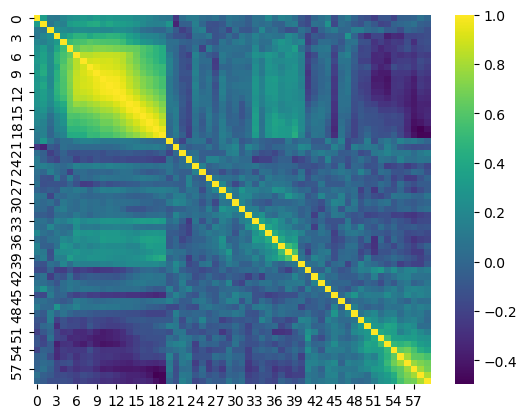

In [13]:
ax = sns.heatmap(norm_cov(desy3_covjk),cmap='viridis')
plt.show()

trying 10 averaged covariances with 150 patches

In [14]:
lst = range(10)
cov_sum = np.zeros((60,60))
for i in lst:
    with h5py.File(f'../TXPipe/data/desy3/outputs_jkknife/tau_stats-150-{i+1}.hdf5') as f:
        cov_sum = cov_sum+f['tau_statistics/tau_PSF-reserved/cov'][:] 
    cov_avg = cov_sum/10

In [15]:
print(calc_chi2(desy3_taujk,cov_avg,desy3_fitjk)/60)

cov_mat chi2
[[2.80745166]]


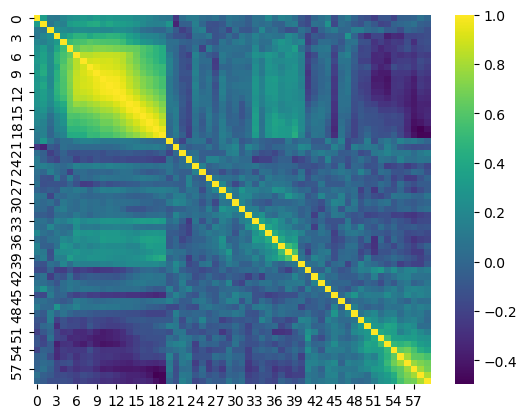

In [16]:
ax = sns.heatmap(norm_cov(cov_avg),cmap='viridis')
plt.show()

hmmmm. the covariances are exactly the same... it may be because its working off the same jackknife patches? 

In [ ]:
'''
import os
import pickle
# Get the list of all files and directories
path = "../covs/"
dir_list = os.listdir(path)
cov_sum = np.array(np.zeros((60,60)))
for i in dir_list:
    with open(path+f'{i}', 'rb') as file:
        cov_ = pickle.load(file)
    cov_sum = cov_sum+np.array(cov_["res"]) 
cov_avg = cov_sum/len(dir_list)
with open('avgd_covs.pkl', 'wb') as newfile:
    pickle.dump(cov_avg,newfile)
'''

Now we try with 150 jackknife covariances, each with their own orientation of 150 patches

In [17]:
import pickle
with open('avgd_covs.pkl', 'rb') as file:
        cov_ = pickle.load(file)

In [18]:
np.shape(cov_)

(1, 60, 60)

In [19]:
np.shape(cov_[0])

(60, 60)

In [20]:
desy3tjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife_avgd/tau_stats.hdf5','r')
desy3rjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife_avgd/rowe_stats.hdf5','r')
desy3_taujk = np.append(desy3tjk['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tjk['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tjk['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covjk = desy3tjk['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitjk = np.append(desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])

In [21]:
print(calc_chi2(desy3_taujk,cov_[0],desy3_fitjk)/60)

cov_mat chi2
[[6.67015979]]


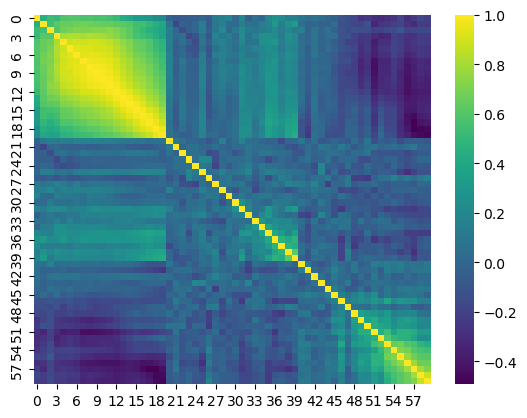

In [22]:
ax = sns.heatmap(norm_cov(cov_[0]),cmap='viridis')
plt.show()

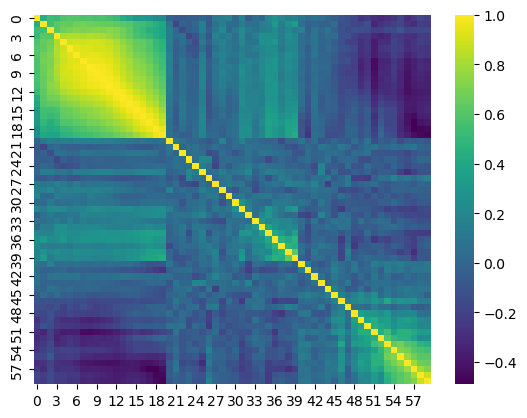

In [23]:
ax = sns.heatmap(norm_cov(desy3_covjk),cmap='viridis')
plt.show()

Compare to 150 averaged bootstrap covariances, each with their own set of patches as well <br> also, uses the standard amt of realization. 

In [24]:
#100 avgd bootstrap covs:
import os
import pickle

In [ ]:

path = "../covs_bootstrap/"
dir_list = os.listdir(path)
cov_sum = np.array(np.zeros((60,60)))
for i in dir_list:
    with open(path+f'{i}', 'rb') as file:
        cov_ = pickle.load(file)
    cov_sum = cov_sum+np.array(cov_["res"]) 
cov_avg = cov_sum/len(dir_list)
with open('avgd_covs_bootstrap.pkl', 'wb') as newfile:
    pickle.dump(cov_avg,newfile)


In [25]:
import pickle
with open('avgd_covs_bootstrap.pkl', 'rb') as file:
        cov_ = pickle.load(file)

In [26]:
desy3tbs = h5py.File('../TXPipe/data/desy3/outputs_bootstrap_avgd/tau_stats.hdf5','r')
desy3rbs = h5py.File('../TXPipe/data/desy3/outputs_bootstrap_avgd/rowe_stats.hdf5','r')
desy3_taubs = np.append(desy3tbs['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tbs['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tbs['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covbs = desy3tbs['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitbs = np.append(desy3tbs['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rbs['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/beta']*desy3rbs['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/eta']*desy3rbs['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tbs['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rbs['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/beta']*desy3rbs['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/eta']*desy3rbs['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tbs['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rbs['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/beta']*desy3rbs['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/eta']*desy3rbs['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])

In [27]:
print(calc_chi2(desy3_taubs,cov_[0],desy3_fitbs)/60)

cov_mat chi2
[[6.19232147]]


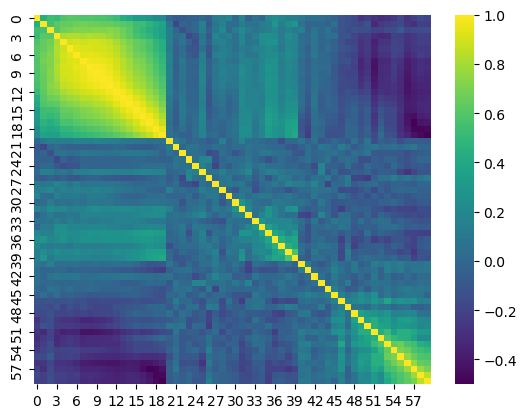

In [28]:
ax = sns.heatmap(norm_cov(cov_[0]),cmap='viridis')
plt.show()

Now we will see how the chi2/dof changes wrt the number of covariances that go into the averaged. 

In [29]:
path = "../covs/"
dir_list = os.listdir(path)
jkknife_avgd = np.array(np.zeros((7,60,60)))
l=0
for x in [20,40,60,80,100,120,140]:
    cov_sum = np.array(np.zeros((60,60)))
    for i in dir_list[x-20:x]:
        with open(path+f'{i}', 'rb') as file:
            cov_ = pickle.load(file)
        cov_sum = cov_sum+np.array(cov_["res"]) 
    cov_avg = cov_sum/20
    jkknife_avgd[l] = cov_avg
    l+=1

In [30]:
np.shape(jkknife_avgd)

(7, 60, 60)

In [31]:
np.shape(jkknife_avgd[0])

(60, 60)

In [32]:
jkknife_avgd

array([[[ 2.62522624e-12,  1.01836634e-12,  1.05227428e-12, ...,
         -5.26713755e-16, -3.77416982e-16, -4.34425658e-16],
        [ 1.01836634e-12,  1.97229176e-12,  9.48109435e-13, ...,
         -6.06237943e-16, -4.13946291e-16, -4.22831103e-16],
        [ 1.05227428e-12,  9.48109435e-13,  1.50013406e-12, ...,
         -3.11875103e-16, -2.91016524e-16, -2.67256080e-16],
        ...,
        [-5.26713755e-16, -6.06237943e-16, -3.11875103e-16, ...,
          1.93060523e-18,  1.44596440e-18,  1.25033307e-18],
        [-3.77416982e-16, -4.13946291e-16, -2.91016524e-16, ...,
          1.44596440e-18,  1.71429447e-18,  1.45632983e-18],
        [-4.34425658e-16, -4.22831103e-16, -2.67256080e-16, ...,
          1.25033307e-18,  1.45632983e-18,  1.61497212e-18]],

       [[ 2.59946284e-12,  1.03630545e-12,  1.07044530e-12, ...,
         -5.13145623e-16, -3.48816597e-16, -4.13123404e-16],
        [ 1.03630545e-12,  2.01045182e-12,  9.78022226e-13, ...,
         -6.15786661e-16, -4.07934729e

In [33]:
chisqjk = np.array(np.zeros(7))
for i in range(7):
    chisqjk[i] = calc_chi2(desy3_taujk,jkknife_avgd[i],desy3_fitjk)/60

cov_mat chi2
cov_mat chi2
cov_mat chi2
cov_mat chi2
cov_mat chi2
cov_mat chi2
cov_mat chi2


/tmp/ipykernel_871556/3081906534.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chisqjk[i] = calc_chi2(desy3_taujk,jkknife_avgd[i],desy3_fitjk)/60


In [34]:
path = "../covs_bootstrap/"
dir_list = os.listdir(path)
btstrp_avgd = np.array(np.zeros((7,60,60)))
l=0
for x in [20,40,60,80,100,120,140]:
    cov_sum = np.array(np.zeros((60,60)))
    for i in dir_list[x-20:x]:
        with open(path+f'{i}', 'rb') as file:
            cov_ = pickle.load(file)
        cov_sum = cov_sum+np.array(cov_["res"]) 
    cov_avg = cov_sum/20
    btstrp_avgd[l] = cov_avg
    l+=1

In [35]:
chisqbs = np.array(np.zeros(7))
for i in range(7):
    chisqbs[i] = calc_chi2(desy3_taubs,btstrp_avgd[i],desy3_fitbs)/60

cov_mat chi2
cov_mat chi2
cov_mat chi2
cov_mat chi2
cov_mat chi2
cov_mat chi2
cov_mat chi2


/tmp/ipykernel_871556/2380227320.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chisqbs[i] = calc_chi2(desy3_taubs,btstrp_avgd[i],desy3_fitbs)/60


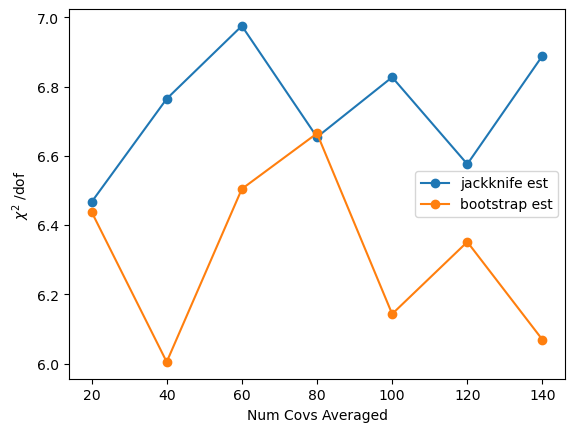

In [43]:
plt.plot([20,40,60,80,100,120,140],chisqjk,marker='o',label='jackknife est')
plt.plot([20,40,60,80,100,120,140],chisqbs,marker='o',label='bootstrap est')

plt.ylabel(r'$\chi^2$ /dof')
plt.xlabel('Num Covs Averaged')
plt.legend()